In [100]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [101]:
df = pd.read_csv("Loan Eligibility Prediction.csv")

df.head()


,Customer_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,569,Female,No,0,Graduate,No,2378,0.0,9,360,1,Urban,N
1,15,Male,Yes,2,Graduate,No,1299,1086.0,17,120,1,Urban,Y
2,95,Male,No,0,Not Graduate,No,3620,0.0,25,120,1,Semiurban,Y
3,134,Male,Yes,0,Graduate,Yes,3459,0.0,25,120,1,Semiurban,Y
4,556,Male,Yes,1,Graduate,No,5468,1032.0,26,360,1,Semiurban,Y


In [102]:
num_cols = ['Applicant_Income','Coapplicant_Income','Loan_Amount','Loan_Amount_Term']

for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    df[col] = df[col].fillna(df[col].median())



In [103]:
cat_cols = ['Gender', 'Married', 'Dependents', 'Education',
            'Self_Employed', 'Credit_History', 'Property_Area', 'Loan_Status']

for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])



In [104]:
le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col])


In [105]:
X = df.drop(['Loan_Status', 'Customer_ID'], axis=1)
y = df['Loan_Status']

feature_cols = X.columns  

In [106]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [107]:
model = RandomForestClassifier(
    n_estimators=300,
    random_state=42
)

model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300, random_state=42)

In [108]:
preds = model.predict(X_test)

print("Exactitud (accuracy):", accuracy_score(y_test, preds))
print("\nMatriz de confusión:\n", confusion_matrix(y_test, preds))
print("\nReporte de clasificación:\n", classification_report(y_test, preds))

Exactitud (accuracy): 0.8130081300813008

Matriz de confusión:
 [[23 17]
 [ 6 77]]

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.79      0.57      0.67        40
           1       0.82      0.93      0.87        83

    accuracy                           0.81       123
   macro avg       0.81      0.75      0.77       123
weighted avg       0.81      0.81      0.80       123



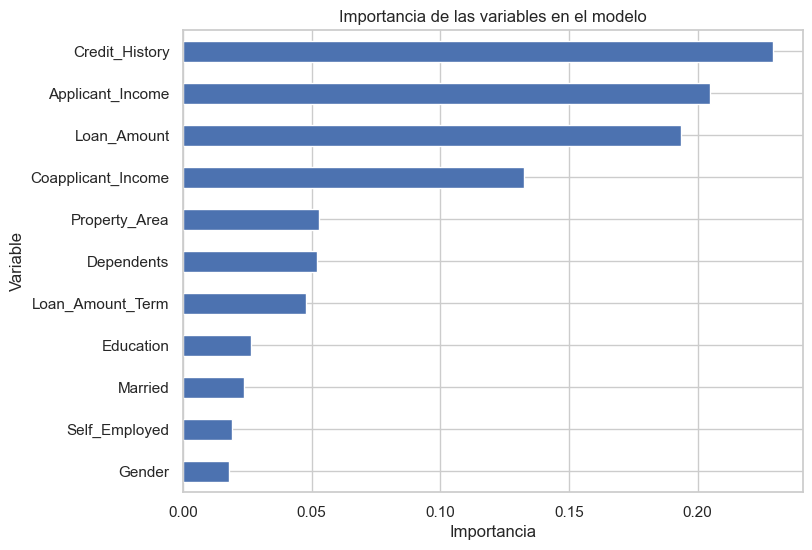

In [109]:
importances = pd.Series(model.feature_importances_, index=feature_cols)
importances.sort_values().plot(kind='barh', figsize=(8,6))
plt.title("Importancia de las variables en el modelo")
plt.xlabel("Importancia")
plt.ylabel("Variable")
plt.show()

In [110]:
def credit_score(cliente: pd.DataFrame, model, feature_cols):
    """
    cliente: DataFrame con 1 fila
    model: modelo entrenado (RandomForestClassifier)
    feature_cols: columnas que usó el modelo para entrenar (mismo orden)
    """
  
    cliente = cliente[feature_cols]
    
    prob = model.predict_proba(cliente)[0][1] 
    score = int(300 + prob * 600)            
    return score, prob

In [111]:
# Tomamos la primera fila del conjunto de test
un_cliente = X_test.iloc[[0]]   

score, prob = credit_score(un_cliente, model, feature_cols)

print("Probabilidad de aprobación:", prob)
print("Credit Score del cliente:", score)
print("Features del cliente:")
un_cliente

Probabilidad de aprobación: 0.7333333333333333
Credit Score del cliente: 740
Features del cliente:


,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area
350,1,0,2,0,0,4354,0.0,136,360,1,0


In [112]:
cliente_manual = X_test.iloc[[0]].copy()

cliente_manual['Applicant_Income'] = 8000
cliente_manual['Coapplicant_Income'] = 2000
cliente_manual['Loan_Amount'] = 150

score2, prob2 = credit_score(cliente_manual, model, feature_cols)

print("Probabilidad de aprobación:", prob2)
print("Credit Score del cliente:", score2)
cliente_manual


Probabilidad de aprobación: 0.87
Credit Score del cliente: 822


,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area
350,1,0,2,0,0,8000,2000,150,360,1,0


In [113]:
import os
os.getcwd()

'C:\\Users\\radua\\Loan Eligibility Prediction'

In [114]:
import os
os.getcwd()


'C:\\Users\\radua\\Loan Eligibility Prediction'